#### Run of CNN_model_v2 & model_v3 on random Up/Down-sampled data with same train-test sample-size (N=6000)  

##### Input data 
train-test: N=6000 each --- b_2000 + rand_b_400 || nb_6000   
** No holdout data

#### refs  
- REF: http://localhost:8888/notebooks/REFS_and_LINKS.ipynb      


- ref: http://localhost:8888/notebooks/load_Imgs_runtestCNN_v0.ipynb
- ref: http://localhost:8888/notebooks/load_Imgs_BuildTrainTestarrays_v1.ipynb

- nohup ipython notebook 

#### General REQs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [2]:
# !pwd
# path='/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge'
path = '/home/ubuntu/pynb/DG_datachallenge'

#### LOAD Image Arrays

In [6]:
# LOAD saved vars


# Xtrain=np.load(path+'/building_set/TrainX_v0'+'.npy')
# Ytrain=np.load(path+'/building_set/TrainY_v0'+'.npy')
# # print(Xtrain.shape, Ytrain.shape)


# Xtest=np.load(path+'/building_set/TestX_v0'+'.npy')
# Ytest=np.load(path+'/building_set/TestY_v0'+'.npy')
# # print(Xtest.shape, Ytest.shape)


# LARGE files....
# X_all = np.load(path+'/building_set/X_all'+'.npy')
# Y_all = np.load(path+'/building_set/Y_all'+'.npy')
# print(X_all.shape, Y_all.shape)

X_all = np.load(path+'/building_set/X_ubdnb6000_all'+'.npy')
Y_all = np.load(path+'/building_set/Y_ubdnb6000_all'+'.npy')


In [7]:
print(X_all.shape, Y_all.shape)

(12000, 256, 256, 3) (12000, 2)


In [8]:
### Include all images
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_all, Y_all, 
                                                test_size=0.2, 
                                                random_state=9988, 
                                                stratify=Y_all)

In [9]:
def convertKerasY21Darray(kerasY):
    return np.argmax(kerasY,axis = 1)

In [12]:
pd.DataFrame(convertKerasY21Darray(Ytest), columns=['label']).label.value_counts()

1    1248
0    1152
Name: label, dtype: int64

##### DNN  ---------------------------------

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, ZeroPadding2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, rmsprop

# from keras.layers import merge
# from keras.layers.core import Lambda
# from keras.models import Model

# from keras import backend as K
# import tensorflow as tf


Using TensorFlow backend.


In [14]:
#v1/v2: [64,64 | 128, 128 | 256 256] || [3,3 || 3,3 || 3,3]
#v3:   [64,64 | 128, 128 | 256 256] || [3,3 || 5,5 || 7,7] ??


def cnn_model():
    model = Sequential()

    model.add(Convolution2D(64, (3, 3), padding='same', kernel_initializer='lecun_uniform',
                            input_shape=(256, 256, 3),
                            activation='relu'))
    model.add(Convolution2D(64, (3, 3), kernel_initializer='lecun_uniform',
                            activation='relu') )
    model.add(MaxPooling2D(pool_size=(2, 2),
                           #strides=(2, 2) 
                          ))
    model.add(Dropout(0.2))

    
    model.add(Convolution2D(128, (5, 5), padding='same', kernel_initializer='lecun_uniform',
                            activation='relu'))
    
    model.add(Convolution2D(128, (5, 5), kernel_initializer='lecun_uniform',
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           #strides=(2, 2) 
                          ))
    model.add(Dropout(0.2))

    
    model.add(Convolution2D(256, (7, 7), padding='same', kernel_initializer='lecun_uniform',
                            activation='relu'))
    
    model.add(Convolution2D(256, (7, 7), kernel_initializer='lecun_uniform',
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           #strides=(2, 2) 
                          ))
    model.add(Dropout(0.2))

    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    

    model.add(Dense(2, activation='softmax'))
    return model

In [15]:
cnn_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 254, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 127, 127, 128)     204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 123, 123, 128)     409728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 128)       0         
__________

In [ ]:
# http://stackoverflow.com/questions/42606207/keras-custom-decision-threshold-for-precision-and-recall
# http://stackoverflow.com/questions/41458859/keras-custom-metric-for-single-class-accuracy

# import keras.backend as K # not working...?

# def mean_pred(y_true, y_pred):
#     return K.mean(y_pred)

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy', mean_pred])


# def precision(y_true, y_pred):
#     """Precision metric.
#     Computes the precision over the whole batch 
#     """
#     # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
#     true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
#     # count the predicted positives
#     predicted_positives = K.sum(y_pred)
#     # Get the precision ratio
#     precision_ratio = true_positives / (predicted_positives + K.epsilon())
#     return precision_ratio



# def recall(y_true, y_pred):
#     """Recall metric.
#     Computes the recall over the whole batch 
#     """
#     # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
#     true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
#     # Compute the number of positive targets.
#     possible_positives = K.sum(K.clip(y_true, 0, 1))
#     recall_ratio = true_positives / (possible_positives + K.epsilon())
#     return recall_ratio


In [16]:
#http://sebastianruder.com/optimizing-gradient-descent/index.html#rmsprop
from keras.optimizers import RMSprop, Adam, SGD 
from keras import metrics #https://github.com/fchollet/keras/wiki/Keras-2.0-release-notes
# import keras_metrics

model = cnn_model()

# Train the model 
lr = 0.0001 #0.001 # #0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              #loss='binary_crossentropy',
              #optimizer=sgd, ## NOTgreat
              optimizer=RMSprop(lr=lr),    
              metrics=['accuracy']
              #metrics=['accuracy',precision,recall] # removed from updated keras API || define own?
              )


In [17]:
from keras.callbacks import History, ModelCheckpoint, EarlyStopping, LearningRateScheduler

# filepath='./model/model_v1c.h5'
# filepath='./model/model_v1d.h5'
# filepath='./model/model_v1e.h5'
# filepath='./model/model_v1f.h5'

# filepath='./model/model_v2.h5' #XY_all
# filepath='./model/model_v2b.h5'

filepath='./model/model_v3.h5' #XY_ubdnb6000_all
# filepath = input()

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max') 
history = History()

early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=4, mode='auto')  #patience=3
        

In [18]:
batch_size = 32
nb_epoch = 20 #10 

def lr_schedule(epoch):
    return lr*(0.1**int(epoch/10))


model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=nb_epoch,
            validation_split=0.2, shuffle=True, 
          callbacks=[LearningRateScheduler(lr_schedule),
                    early_stopping,checkpoint, history]          
          #callbacks=[early_stopping, checkpoint, history]
         )


Train on 7680 samples, validate on 1920 samples
Epoch 1/20
7680/7680 [==============================] - 506s - loss: 3.1036 - acc: 0.5626 - val_loss: 0.5942 - val_acc: 0.7615
Epoch 2/20
7680/7680 [==============================] - 502s - loss: 0.4933 - acc: 0.7826 - val_loss: 0.3383 - val_acc: 0.8641
Epoch 3/20
7680/7680 [==============================] - 502s - loss: 0.3503 - acc: 0.8548 - val_loss: 0.3032 - val_acc: 0.8802
Epoch 4/20
7680/7680 [==============================] - 501s - loss: 0.2659 - acc: 0.8928 - val_loss: 0.2355 - val_acc: 0.8995
Epoch 5/20
7680/7680 [==============================] - 491s - loss: 0.2393 - acc: 0.9107 - val_loss: 0.3339 - val_acc: 0.8432
Epoch 6/20
7680/7680 [==============================] - 500s - loss: 0.2052 - acc: 0.9238 - val_loss: 0.1975 - val_acc: 0.9302
Epoch 7/20
7680/7680 [==============================] - 499s - loss: 0.1809 - acc: 0.9342 - val_loss: 0.1607 - val_acc: 0.9385
Epoch 8/20
7680/7680 [==============================] - 499s - 

In [ ]:
#filepath='./model/model_v1c.h5'

In [19]:
from sklearn.metrics import log_loss

Ypreds = model.predict(Xtest, verbose=1)
print("Validation Log Loss: {}".format(log_loss(Ytest, Ypreds)))

2400/2400 [==============================] - 36s     

In [ ]:
# Validation Log Loss: 
# filepath='./model/model_v1c.h5' # >10
# filepath='./model/model_v1d.h5' # 5.18
# filepath='./model/model_v1e.h5' # 2.826
# model_v1e.h5 + sgd instead of rmsprops # 0.69 BUT accuracy ~0.5! Not great.
# filepath='./model/model_v1f.h5' # 9.78

# filepath='./model/model_v2.h5' # 0.28
# filepath='./model/model_v2a.h5' # 0.7
# filepath='./model/model_v2b.h5' # 3.453877639770508

# filepath='./model/model_v3.h5' # 0.1088 *** #XY_ubdnb6000_all

In [20]:
def convertKerasY21Darray(kerasY):
    return np.argmax(kerasY,axis = 1)
    

In [21]:
Y_preds = convertKerasY21Darray(Ypreds)
Y_test = convertKerasY21Darray(Ytest)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
accuracy_score(Y_test, Y_preds) 

#filepath='./model/model_v1c.h5' #0.555
#filepath='./model/model_v1d.h5' #0.613
#filepath='./model/model_v1e.h5' #0.576

#filepath='./model/model_v2.h5' #0.910 ??
#filepath='./model/model_v2b.h5' #0.90 ??

#filepath='./model/model_v3.h5' #0.9725 *** #XY_ubdnb6000_all

0.97250000000000003

In [24]:
import pandas as pd

In [25]:
pd.DataFrame(Y_test, columns=['B']).B.value_counts()

1    1248
0    1152
Name: B, dtype: int64

In [26]:
print (classification_report(Y_test,Y_preds,target_names = ['no_buildings','buildings']) )

              precision    recall  f1-score   support

no_buildings       0.97      0.97      0.97      1152
   buildings       0.97      0.97      0.97      1248

 avg / total       0.97      0.97      0.97      2400



In [27]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1119   33]
 [  33 1215]]


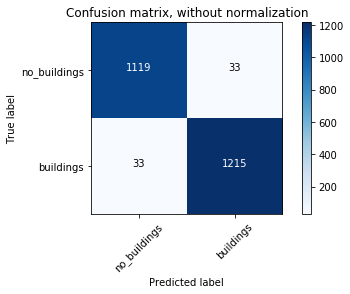

In [28]:
cnf_matrix = confusion_matrix(Y_test,Y_preds)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no_buildings','buildings'],
                      title='Confusion matrix, without normalization')

In [ ]:
# list(zip(Y_test,Y_preds))
# import pandas as pd

In [29]:
history.history

{'acc': [0.56263020833333333,
  0.78255208333333337,
  0.85481770833333337,
  0.89283854166666665,
  0.9106770833333333,
  0.923828125,
  0.93424479166666663,
  0.94622395833333328,
  0.95494791666666667,
  0.96601562500000004,
  0.98450520833333333,
  0.99036458333333333],
 'loss': [3.1035782270133496,
  0.49332931414246561,
  0.35025062778343757,
  0.26594794009191297,
  0.23934589740820228,
  0.20515692282157641,
  0.18093526978821803,
  0.14666212867790213,
  0.14256026381626724,
  0.10508093893501307,
  0.043066495201007152,
  0.029584997917724346],
 'val_acc': [0.76145833333333335,
  0.86406249999999996,
  0.88020833333333337,
  0.89947916666666672,
  0.8432291666666667,
  0.9302083333333333,
  0.93854166666666672,
  0.9526041666666667,
  0.94427083333333328,
  0.95156249999999998,
  0.95937499999999998,
  0.96250000000000002],
 'val_loss': [0.59422425329685213,
  0.33827362606922784,
  0.30324636995792387,
  0.23547965635855991,
  0.33385935661693417,
  0.19752478726829092,
  0.

In [ ]:
len(history.history['acc'])

In [30]:
HISTORY = pd.DataFrame(history.history)
HISTORY

,acc,loss,val_acc,val_loss
0,0.562630,3.103578,0.761458,0.594224
1,0.782552,0.493329,0.864062,0.338274
2,0.854818,0.350251,0.880208,0.303246
3,0.892839,0.265948,0.899479,0.235480
4,0.910677,0.239346,0.843229,0.333859
5,0.923828,0.205157,0.930208,0.197525
6,0.934245,0.180935,0.938542,0.160748
7,0.946224,0.146662,0.952604,0.162070
8,0.954948,0.142560,0.944271,0.200403
9,0.966016,0.105081,0.951562,0.161539


In [37]:
# HISTORY.to_csv(path+'/building_set/XY_ubdnb6000_model_v3History.csv')
HISTORY.to_csv('./model/XY_ubdnb6000_model_v3History.csv')

In [34]:
import seaborn as sns

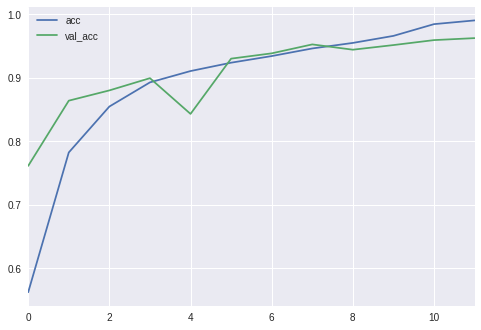

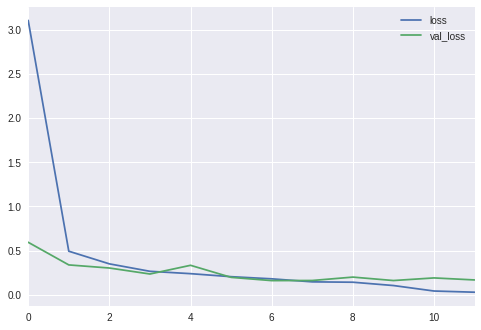

In [35]:

HISTORY.plot(y=['acc','val_acc'])
HISTORY.plot(y=['loss','val_loss'])

In [54]:
Xtest.shape

(2400, 256, 256, 3)

In [49]:
Xtest[0].shape

(256, 256, 3)

In [56]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

0 0


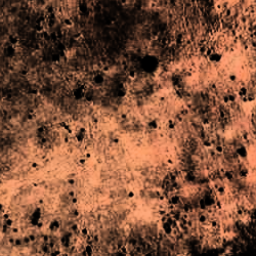

In [81]:
n=1440 #240 #1000 
print(Y_test[n], Y_preds[n])
array_to_img(Xtest[n]) 


1 1


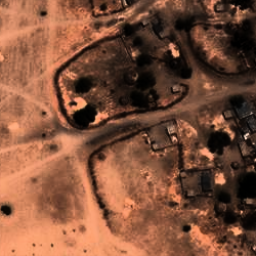

In [85]:
n=1240 #1000
print(Y_test[n], Y_preds[n])
array_to_img(Xtest[n]) 
